# 4.5.5. Exercises


In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l
import pandas as pd


class SoftmaxRegression(d2l.Classifier):  # @save
  """The softmax regression model."""

  def __init__(self, num_outputs, lr):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_outputs))

  def forward(self, X):
    return self.net(X)

##### 1. Deep learning uses many different number formats, including FP64 double precision (used extremely rarely), FP32 single precision, BFLOAT16 (good for compressed representations), FP16 (very unstable), TF32 (a new format from NVIDIA), and INT8. Compute the smallest and largest argument of the exponential function for which the result does not lead to numerical underflow or overflow.

**深度学习使用多种不同的数字格式，包括极少使用的 FP64 双精度、FP32 单精度、适合压缩表示的 BFLOAT16、非常不稳定的 FP16、NVIDIA 的新格式 TF32 和 INT8。计算指数函数的最小和最大参数，以确保结果不会导致数值下溢或上溢。**


In [3]:
def get_type_info(t):
  min1, max1 = 0, 0
  if t == torch.int8:
    min1, max1 = 1, torch.iinfo(t).max
  else:
    min1, max1 = torch.finfo(t).tiny, torch.finfo(t).max
  if t not in [torch.int8, torch.float16]:
    exp_max = torch.log(torch.tensor(max1, dtype=t))
    exp_min = torch.log(torch.tensor(min1, dtype=t))
  else:
    exp_max = torch.log(torch.tensor(max1))
    exp_min = torch.log(torch.tensor(min1))
  return exp_min.item(), exp_max.item()


formats = [torch.float64, torch.float32, torch.bfloat16, torch.float16, torch.int8]
df = pd.DataFrame({"format": formats})
df[["exp_min", "exp_max"]] = df.apply(lambda x: get_type_info(x[0]), result_type="expand", axis=1)
df

,format,exp_min,exp_max
0,torch.float64,-708.396419,709.782713
1,torch.float32,-87.336548,88.722839
2,torch.bfloat16,-87.500000,88.500000
3,torch.float16,-9.704061,11.089867
4,torch.int8,0.000000,4.844187


##### 2. INT8 is a very limited format consisting of nonzero numbers from $1$ to $255$. How could you extend its dynamic range without using more bits? Do standard multiplication and addition still work?

**INT8 是一种非常有限的格式，由非零数字组成，范围从 $1$ 到 $255$ 。你如何在不使用更多位的情况下扩展它的动态范围？标准的乘法和加法仍然有效吗？**


##### 3. Increase the number of epochs for training. Why might the validation accuracy decrease after a while? How could we fix this?

**增加训练的轮数。为什么验证准确率会在一段时间后下降？我们该如何解决这个问题？**


答：主要原因可能是模型过拟合。我们可以使用正则化、提前停止等方法来防止模型过拟合。


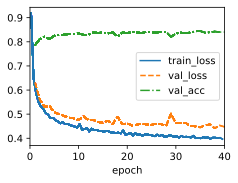

In [5]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=40)
trainer.fit(model, data)

##### 4. What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?

**当你增加学习率时会发生什么？比较几个学习率的损失曲线。哪个效果更好？在什么时候？**


答：随着学习率的增加，模型的权重在每次迭代后更新得更加显著，导致收敛速度加快，但可能会导致超越最佳权重并发散。

- 小学习率：小学习率导致收敛速度慢，可能会陷入局部最小值。损失曲线可能显示出逐渐下降，但收敛过程可能很慢。
- 大学习率：较大的学习率可能导致损失曲线出现振荡、不稳定行为，甚至发散。损失可能增加而不是减少，这表明权重在波动而没有收敛。
- 最佳学习率：最佳学习率使模型能够平稳收敛并达到较低的损失。损失曲线可能会显示出稳定下降，没有过冲或发散的迹象。


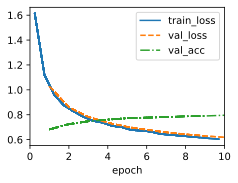

In [6]:
data = d2l.FashionMNIST(batch_size=256)

model = SoftmaxRegression(num_outputs=10, lr=0.01)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

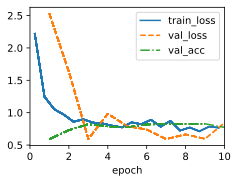

In [8]:
data = d2l.FashionMNIST(batch_size=256)

model = SoftmaxRegression(num_outputs=10, lr=0.5)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)